# Importing the dataset and libraries

In [1]:
pip install tensorflow

In [148]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm
import seaborn as sns
from sklearn.impute import SimpleImputer

In [149]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
%matplotlib inline

In [150]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/hypothyroid.data"
df = pd.read_csv(url, header=None)

In [151]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?


# Data Cleaning

Let's get the column names at glance to understand the data better

In [152]:
def fetch_hypothyroid_names(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.text
    else:
        return None
hypothyroid_names_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/hypothyroid.names"
hypothyroid_names_content = fetch_hypothyroid_names(hypothyroid_names_url)

In [153]:
print(hypothyroid_names_content)

hypothyroid, negative.

age:				 continuous,?.
sex:				 M,F,?.
on_thyroxine:			 f,t.
query_on_thyroxine:		 f,t.
on_antithyroid_medication:	 f,t.
thyroid_surgery:		 f,t.
query_hypothyroid:		 f,t.
query_hyperthyroid:		 f,t.
pregnant:			 f,t.
sick:				 f,t.
tumor:				 f,t.
lithium:			 f,t.
goitre:				 f,t.
TSH_measured:			 f,t.
TSH:				 continuous,?.
T3_measured:			 f,t.
T3:				 continuous,?.
TT4_measured:			 f,t.
TT4:				 continuous,?.
T4U_measured:			 f,t.
T4U:				 continuous,?.
FTI_measured:			 f,t.
FTI:				 continuous,?.
TBG_measured:			 f,t.
TBG:				 continuous,?.




In [154]:
col = list(range(25))

# Rename column names as above for easier understanding

colnames = [
    'Disease_prediction', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication',
    'thyroid_surgery', 'query_hypothyroid', 'query_hyperthyroid', 'pregnant', 'sick',
    'tumor', 'lithium', 'goitre', 'TSH_measured', 'TSH', 'T3_measured', 'T3',
    'TT4_measured', 'TT4', 'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'
]

df.columns = colnames
df.head(2)

,Disease_prediction,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?


As the dataset is large, we try to understand some attributes of it to help us understand the data better

In [155]:
df.shape # Data has 3163 rows and 26 columns

(3163, 26)

In [156]:
# Let's try to view our data at a glance
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    describe_df = df.describe(include='all')

In [157]:
describe_df.T

,count,unique,top,freq
Disease_prediction,3163,2,negative,3012
age,3163,93,?,446
sex,3163,3,F,2182
on_thyroxine,3163,2,f,2702
query_on_thyroxine,3163,2,f,3108
on_antithyroid_medication,3163,2,f,3121
thyroid_surgery,3163,2,f,3059
query_hypothyroid,3163,2,f,2922
query_hyperthyroid,3163,2,f,2920
pregnant,3163,2,f,3100


Missing Values

In [158]:
# We observed that the missing values are represented by '?', so we replace them back as NA
df=df.replace({"?":np.NAN})

In [159]:
df.isnull().sum()

# There are multiple missing values, let's deal with them on a case by case basis
df

,Disease_prediction,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,NaN
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,NaN
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,NaN
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,NaN
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58,F,f,f,f,f,f,f,f,...,y,1.70,y,86,y,0.91,y,95,n,NaN
3159,negative,29,F,f,f,f,f,f,f,f,...,y,1.80,y,99,y,1.01,y,98,n,NaN
3160,negative,77,M,f,f,f,f,f,f,f,...,y,0.60,y,71,y,0.68,y,104,n,NaN
3161,negative,74,F,f,f,f,f,f,f,f,...,y,0.10,y,65,y,0.48,y,137,n,NaN


In [160]:
# Let's check the datatypes of our data and convert them to numerics
df.dtypes

# It's all in object right now, to deal with missing vals, we need numeric

Disease_prediction           object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [161]:
# First let's convert categorical values to numeric
df=df.replace({"t":1,"f":0})

In [162]:
df=df.replace({"M":1,"F":0})

In [163]:
df["T3_measured"].value_counts()

y    2468
n     695
Name: T3_measured, dtype: int64

In [164]:
df["TT4_measured"].value_counts()

y    2914
n     249
Name: TT4_measured, dtype: int64

In [165]:
df=df.replace({"y":1,"n":0})
# converting values like 'T3_measured' to numeric

In [166]:
df

,Disease_prediction,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,1.0,0,0,0,0,0,0,0,...,1,0.60,1,15,1,1.48,1,10,0,NaN
1,hypothyroid,15,0.0,1,0,0,0,0,0,0,...,1,1.70,1,19,1,1.13,1,17,0,NaN
2,hypothyroid,24,1.0,0,0,0,0,0,0,0,...,1,0.20,1,4,1,1,1,0,0,NaN
3,hypothyroid,24,0.0,0,0,0,0,0,0,0,...,1,0.40,1,6,1,1.04,1,6,0,NaN
4,hypothyroid,77,1.0,0,0,0,0,0,0,0,...,1,1.20,1,57,1,1.28,1,44,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58,0.0,0,0,0,0,0,0,0,...,1,1.70,1,86,1,0.91,1,95,0,NaN
3159,negative,29,0.0,0,0,0,0,0,0,0,...,1,1.80,1,99,1,1.01,1,98,0,NaN
3160,negative,77,1.0,0,0,0,0,0,0,0,...,1,0.60,1,71,1,0.68,1,104,0,NaN
3161,negative,74,0.0,0,0,0,0,0,0,0,...,1,0.10,1,65,1,0.48,1,137,0,NaN


In [167]:
X = df.drop(columns=['Disease_prediction'])

In [168]:
X

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,72,1.0,0,0,0,0,0,0,0,0,...,1,0.60,1,15,1,1.48,1,10,0,NaN
1,15,0.0,1,0,0,0,0,0,0,0,...,1,1.70,1,19,1,1.13,1,17,0,NaN
2,24,1.0,0,0,0,0,0,0,0,0,...,1,0.20,1,4,1,1,1,0,0,NaN
3,24,0.0,0,0,0,0,0,0,0,0,...,1,0.40,1,6,1,1.04,1,6,0,NaN
4,77,1.0,0,0,0,0,0,0,0,0,...,1,1.20,1,57,1,1.28,1,44,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,58,0.0,0,0,0,0,0,0,0,0,...,1,1.70,1,86,1,0.91,1,95,0,NaN
3159,29,0.0,0,0,0,0,0,0,0,0,...,1,1.80,1,99,1,1.01,1,98,0,NaN
3160,77,1.0,0,0,0,0,0,0,0,0,...,1,0.60,1,71,1,0.68,1,104,0,NaN
3161,74,0.0,0,0,0,0,0,0,0,0,...,1,0.10,1,65,1,0.48,1,137,0,NaN


In [169]:
newnames = [
    'age', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication',
    'thyroid_surgery', 'query_hypothyroid', 'query_hyperthyroid', 'pregnant', 'sick',
    'tumor', 'lithium', 'goitre', 'TSH_measured', 'TSH', 'T3_measured', 'T3',
    'TT4_measured', 'TT4', 'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'
]

In [170]:
X[newnames] = X[newnames].apply(pd.to_numeric, errors='coerce')
X.dtypes

age                          float64
sex                          float64
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
thyroid_surgery                int64
query_hypothyroid              int64
query_hyperthyroid             int64
pregnant                       int64
sick                           int64
tumor                          int64
lithium                        int64
goitre                         int64
TSH_measured                   int64
TSH                          float64
T3_measured                    int64
T3                           float64
TT4_measured                   int64
TT4                          float64
T4U_measured                   int64
T4U                          float64
FTI_measured                   int64
FTI                          float64
TBG_measured                   int64
TBG                          float64
dtype: object

In [171]:
X.isnull().sum()

age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [172]:
# getting mean values in place of null values
X['sex'].fillna(X['sex'].mean(), inplace=True)
X['age'].fillna(X['age'].mean(), inplace=True)

In [173]:
#Using simple imputer to deal with mean values
imputer = SimpleImputer(strategy='mean')

In [174]:
X['TSH'] = imputer.fit_transform(X[['TSH']])
X['T3'] = imputer.fit_transform(X[['T3']])
X['TT4'] = imputer.fit_transform(X[['TT4']])
X['T4U'] = imputer.fit_transform(X[['T4U']])
X['FTI'] = imputer.fit_transform(X[['FTI']])
X['TBG'] = imputer.fit_transform(X[['TBG']])

In [175]:
X.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

# Exploratory Data Analysis

In [176]:
X

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,72.0,1.0,0,0,0,0,0,0,0,0,...,1,0.6,1,15.0,1,1.48,1,10.0,0,31.283077
1,15.0,0.0,1,0,0,0,0,0,0,0,...,1,1.7,1,19.0,1,1.13,1,17.0,0,31.283077
2,24.0,1.0,0,0,0,0,0,0,0,0,...,1,0.2,1,4.0,1,1.00,1,0.0,0,31.283077
3,24.0,0.0,0,0,0,0,0,0,0,0,...,1,0.4,1,6.0,1,1.04,1,6.0,0,31.283077
4,77.0,1.0,0,0,0,0,0,0,0,0,...,1,1.2,1,57.0,1,1.28,1,44.0,0,31.283077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,58.0,0.0,0,0,0,0,0,0,0,0,...,1,1.7,1,86.0,1,0.91,1,95.0,0,31.283077
3159,29.0,0.0,0,0,0,0,0,0,0,0,...,1,1.8,1,99.0,1,1.01,1,98.0,0,31.283077
3160,77.0,1.0,0,0,0,0,0,0,0,0,...,1,0.6,1,71.0,1,0.68,1,104.0,0,31.283077
3161,74.0,0.0,0,0,0,0,0,0,0,0,...,1,0.1,1,65.0,1,0.48,1,137.0,0,31.283077


In [177]:
Y = df['Disease_prediction']
df1 = X.join(Y)

In [178]:
df1 = df1.replace({"hypothyroid":1,"negative":0})

In [179]:
df1.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,Disease_prediction
0,72.0,1.0,0,0,0,0,0,0,0,0,...,0.6,1,15.0,1,1.48,1,10.0,0,31.283077,1
1,15.0,0.0,1,0,0,0,0,0,0,0,...,1.7,1,19.0,1,1.13,1,17.0,0,31.283077,1
2,24.0,1.0,0,0,0,0,0,0,0,0,...,0.2,1,4.0,1,1.00,1,0.0,0,31.283077,1
3,24.0,0.0,0,0,0,0,0,0,0,0,...,0.4,1,6.0,1,1.04,1,6.0,0,31.283077,1
4,77.0,1.0,0,0,0,0,0,0,0,0,...,1.2,1,57.0,1,1.28,1,44.0,0,31.283077,1


In [180]:
# Now that the values are sorted, we try to understand the nature of our data

In [181]:
df1

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,Disease_prediction
0,72.0,1.0,0,0,0,0,0,0,0,0,...,0.6,1,15.0,1,1.48,1,10.0,0,31.283077,1
1,15.0,0.0,1,0,0,0,0,0,0,0,...,1.7,1,19.0,1,1.13,1,17.0,0,31.283077,1
2,24.0,1.0,0,0,0,0,0,0,0,0,...,0.2,1,4.0,1,1.00,1,0.0,0,31.283077,1
3,24.0,0.0,0,0,0,0,0,0,0,0,...,0.4,1,6.0,1,1.04,1,6.0,0,31.283077,1
4,77.0,1.0,0,0,0,0,0,0,0,0,...,1.2,1,57.0,1,1.28,1,44.0,0,31.283077,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,58.0,0.0,0,0,0,0,0,0,0,0,...,1.7,1,86.0,1,0.91,1,95.0,0,31.283077,0
3159,29.0,0.0,0,0,0,0,0,0,0,0,...,1.8,1,99.0,1,1.01,1,98.0,0,31.283077,0
3160,77.0,1.0,0,0,0,0,0,0,0,0,...,0.6,1,71.0,1,0.68,1,104.0,0,31.283077,0
3161,74.0,0.0,0,0,0,0,0,0,0,0,...,0.1,1,65.0,1,0.48,1,137.0,0,31.283077,0


In [182]:
# Get Age in 'AgeCategory' format
df0 = df[["sex", "age", "Disease_prediction"]]
df0 = df0.replace({1:"M",0:"F"})

In [183]:
df0["age"] = pd.to_numeric(df["age"], errors='coerce')

In [184]:
df0.dtypes

sex                    object
age                   float64
Disease_prediction     object
dtype: object

In [185]:
df0 = df0.dropna(axis=0)

In [186]:
df0

,sex,age,Disease_prediction
0,M,72.0,hypothyroid
1,F,15.0,hypothyroid
2,M,24.0,hypothyroid
3,F,24.0,hypothyroid
4,M,77.0,hypothyroid
...,...,...,...
3158,F,58.0,negative
3159,F,29.0,negative
3160,M,77.0,negative
3161,F,74.0,negative


In [258]:
df0.loc[df0['age']  <= 25, 'ageCategory'] = 'Below 25'
df0.loc[(df0['age']  >25) & (df0['age']  <= 35), 'ageCategory'] = '25-35'
df0.loc[(df0['age']  >35) & (df0['age']  <= 45), 'ageCategory'] = '35-45'
df0.loc[(df0['age']  >45) & (df0['age']  <= 55), 'ageCategory'] = '45-55'
df0.loc[df0['age']  >= 55, 'ageCategory'] = '55 & above'

In [259]:
df01 = df0.groupby(['ageCategory', 'sex'])['Disease_prediction'].count().reset_index()
df01.columns=["source", "target","value"]
#Same activity Gender is the Source
df2=df0.reset_index()
df3 = df2.groupby(['sex','Disease_prediction'])['index'].count().reset_index()
df3.columns=["source", "target","value"]

#Change the Col Names
df3
df_concat=pd.concat([df01, df3], axis=0)
source_target=list(pd.unique(df_concat[["source","target"]].values.ravel('K')))
#Creating a Dictonary
mapping_dict = {k: v for v, k in enumerate(source_target)}

In [260]:
df_concat['source'] = df_concat['source'].map(mapping_dict)
df_concat['target'] = df_concat['target'].map(mapping_dict)

In [261]:
#Creating a Dictonary
mapping_dict = {k: v for v, k in enumerate(source_target)}
#Modifing the DataFrame
links_dict=df_concat.to_dict(orient="list")

In [262]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "green", width = 0.7),
      label = source_target,
      color = "blue"
    ),
    link = dict(
      source = links_dict["source"],
      target = links_dict["target"],
      value = links_dict["value"]
  ))])

In [263]:
fig.update_layout(title_text= "Sankey Diagram for Hypothyroidism", font_size=10)
fig.show()

In [193]:
df_Disease=df0[df0['Disease_prediction']=='hypothyroid']
age_sex_groups = df_Disease.groupby(['ageCategory', 'sex'])['Disease_prediction'] .count().reset_index()
import plotly.express as px
fig = px.bar(age_sex_groups, x='ageCategory', y='Disease_prediction', color='sex', barmode='group')
fig.update_layout(title='Hypothyroidism by Age Category and Sex', xaxis_title='Age Category', yaxis_title='Disease_prediction', legend_title='sex')
fig.show()

In [207]:
df2 = df1.copy()
df3 = df2[["T3", "TT4", "T4U", "TBG", "FTI", "Disease_prediction"]]
df3["Disease_prediction"].replace({1: "Hypothyroid", 0: "negative"}, inplace=True)
df3.head(2)

<ipython-input-207-1fa341d82bd3>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,T3,TT4,T4U,TBG,FTI,Disease_prediction
0,0.6,15.0,1.48,31.283077,10.0,Hyperthyroid
1,1.7,19.0,1.13,31.283077,17.0,Hyperthyroid


In [208]:
correlation_matrix = df3.corr()

<ipython-input-208-9b652d392e24>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



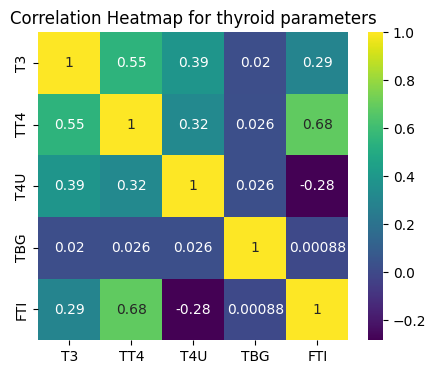

In [211]:
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis")
plt.title("Correlation Heatmap for thyroid parameters")
plt.show()

In [206]:
df2.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG',
       'Disease_prediction'],
      dtype='object')

# Feature Engineering

In [212]:
X.head(2)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,72.0,1.0,0,0,0,0,0,0,0,0,...,1,0.6,1,15.0,1,1.48,1,10.0,0,31.283077
1,15.0,0.0,1,0,0,0,0,0,0,0,...,1,1.7,1,19.0,1,1.13,1,17.0,0,31.283077


In [213]:
Y.value_counts()
(151/3012)*100

5.0132802124834

In [214]:
Y.head()

0    hypothyroid
1    hypothyroid
2    hypothyroid
3    hypothyroid
4    hypothyroid
Name: Disease_prediction, dtype: object

Upsampling data as required

In [215]:
from imblearn.over_sampling import SMOTE

In [216]:
sm = SMOTE()
X_resampled, y_resampled = sm.fit_resample(X, Y)
df_upsampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)

In [217]:
print('Pre SMOTE:', Y.value_counts())
print('Post SMOTE:', y_resampled.value_counts())

Pre SMOTE: negative       3012
hypothyroid     151
Name: Disease_prediction, dtype: int64
Post SMOTE: hypothyroid    3012
negative       3012
Name: Disease_prediction, dtype: int64


In [218]:
x = df_upsampled.drop('Disease_prediction', axis=1)
y = df_upsampled['Disease_prediction']

In [219]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [220]:
from sklearn.preprocessing import StandardScaler

In [221]:
import tensorflow as tf
from tensorflow import keras

In [222]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [223]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

# Neural Network Architectures

In [224]:
df1 = df_upsampled.replace({"hypothyroid":1,"negative":0})

In [225]:
num_classes = len(df1['Disease_prediction'].unique())

# Separate features and labels
X = df1.drop(columns=['Disease_prediction']).values
y = df1['Disease_prediction'].values

# One-hot encode the labels (convert to categorical format)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_onehot = to_categorical(y_encoded)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y_onehot, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [226]:
# Scale the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [227]:
from tensorflow.keras import backend as K

def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))

    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())

    f1 = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return f1

Dense Neural Network

In [228]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),  # Adding a dropout layer after the first Dense layer
    Dense(32, activation='relu'),
    Dropout(0.2),  # Adding another dropout layer after the second Dense layer
    Dense(16, activation='relu'),
    Dropout(0.2),  # Adding a dropout layer after the third Dense layer
    Dense(num_classes, activation='softmax')
])

In [229]:

# Compile the model
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_score])

In [230]:
# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))


Epoch 1/10
132/132 [==============================] - 2s 6ms/step - loss: 0.4248 - accuracy: 0.8465 - f1_score: 0.8467 - val_loss: 0.1371 - val_accuracy: 0.9513 - val_f1_score: 0.9526
Epoch 2/10
132/132 [==============================] - 0s 3ms/step - loss: 0.1404 - accuracy: 0.9568 - f1_score: 0.9569 - val_loss: 0.1082 - val_accuracy: 0.9657 - val_f1_score: 0.9666
Epoch 3/10
132/132 [==============================] - 0s 3ms/step - loss: 0.1106 - accuracy: 0.9666 - f1_score: 0.9665 - val_loss: 0.0991 - val_accuracy: 0.9690 - val_f1_score: 0.9698
Epoch 4/10
132/132 [==============================] - 0s 3ms/step - loss: 0.0875 - accuracy: 0.9725 - f1_score: 0.9725 - val_loss: 0.0981 - val_accuracy: 0.9701 - val_f1_score: 0.9709
Epoch 5/10
132/132 [==============================] - 0s 3ms/step - loss: 0.0811 - accuracy: 0.9739 - f1_score: 0.9740 - val_loss: 0.0948 - val_accuracy: 0.9701 - val_f1_score: 0.9709
Epoch 6/10
132/132 [==============================] - 0s 3ms/step - loss: 0.0767

In [231]:
loss, accuracy, f1_score = model.evaluate(X_test, y_test)

29/29 [==============================] - 0s 1ms/step - loss: 0.0650 - accuracy: 0.9801 - f1_score: 0.9806


In [232]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                1664      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                                 
 dense_14 (Dense)            (None, 16)                528       
                                                                 
 dropout_9 (Dropout)         (None, 16)                0         
                                                                 
 dense_15 (Dense)            (None, 2)                

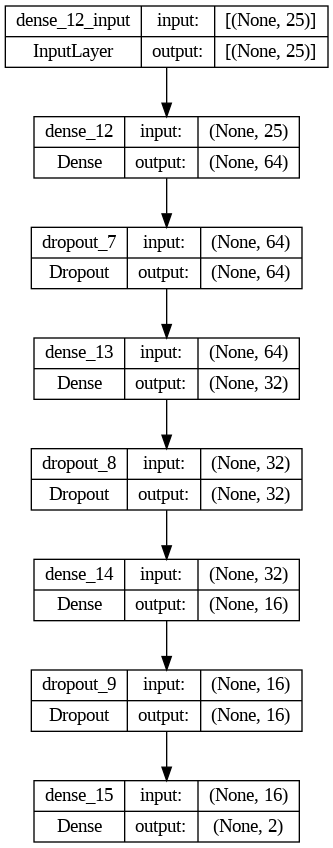

In [233]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='convnet.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet.png')

MLP

In [234]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [235]:
from tensorflow.keras import backend as K

def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))

    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())

    f1 = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return f1

In [236]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

In [237]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_score])

In [238]:
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
132/132 [==============================] - 1s 4ms/step - loss: 0.2905 - accuracy: 0.9374 - f1_score: 0.9375 - val_loss: 0.1266 - val_accuracy: 0.9624 - val_f1_score: 0.9634
Epoch 2/10
132/132 [==============================] - 0s 2ms/step - loss: 0.0922 - accuracy: 0.9756 - f1_score: 0.9755 - val_loss: 0.0967 - val_accuracy: 0.9679 - val_f1_score: 0.9688
Epoch 3/10
132/132 [==============================] - 0s 2ms/step - loss: 0.0728 - accuracy: 0.9777 - f1_score: 0.9777 - val_loss: 0.0904 - val_accuracy: 0.9723 - val_f1_score: 0.9731
Epoch 4/10
132/132 [==============================] - 0s 2ms/step - loss: 0.0644 - accuracy: 0.9796 - f1_score: 0.9796 - val_loss: 0.0866 - val_accuracy: 0.9701 - val_f1_score: 0.9709
Epoch 5/10
132/132 [==============================] - 0s 3ms/step - loss: 0.0591 - accuracy: 0.9791 - f1_score: 0.9791 - val_loss: 0.0880 - val_accuracy: 0.9679 - val_f1_score: 0.9688
Epoch 6/10
132/132 [==============================] - 0s 3ms/step - loss: 0.0560

In [239]:
# Evaluate the model on the test set
f1_score, loss, accuracy = model.evaluate(X_test, y_test)

29/29 [==============================] - 0s 2ms/step - loss: 0.0595 - accuracy: 0.9801 - f1_score: 0.9806


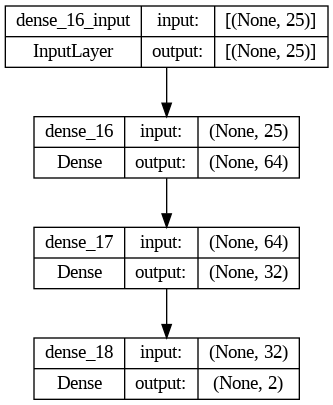

In [240]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='convnet.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet.png')

SEQUENTIAL MODEL

In [245]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [246]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [247]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

In [248]:
def f1_score(y_true, y_pred):
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    possible_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true, 0, 1)))
    predicted_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_pred, 0, 1)))

    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    recall = true_positives / (possible_positives + tf.keras.backend.epsilon())

    f1 = 2 * (precision * recall) / (precision + recall + tf.keras.backend.epsilon())
    return f1

In [249]:
model = Sequential()
model.add(Dense(256, input_shape=[x.shape[1]], activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(63, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

In [250]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 256)               6656      
                                                                 
 dropout_11 (Dropout)        (None, 256)               0         
                                                                 
 dense_21 (Dense)            (None, 128)               32896     
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_22 (Dense)            (None, 63)                8127      
                                                                 
 dropout_13 (Dropout)        (None, 63)                0         
                                                                 
 dense_23 (Dense)            (None, 1)                

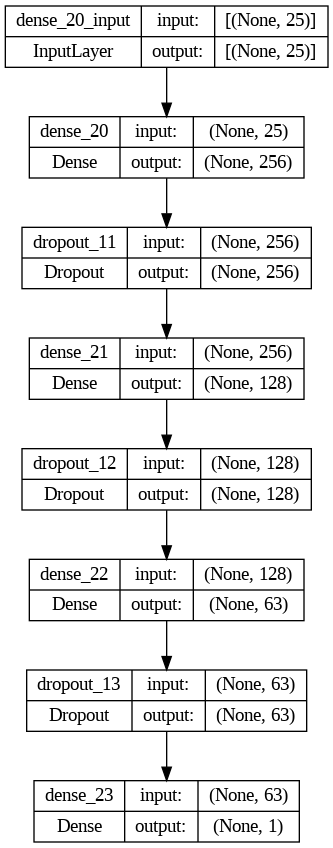

In [251]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='convnet.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet.png')

In [252]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy', f1_score])
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'precision', 'recall', 'f1'])

In [253]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',
                         patience = 20,
                         verbose = 1,
                         factor = 0.75,
                         min_lr = 1e-10)

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=20)

In [254]:
history = model.fit(x=x_train, y=y_train, epochs=10, callbacks=[lrd, mcp, es], batch_size=64, validation_split=0.1)

Epoch 1/10
64/64 [==============================] - 2s 13ms/step - loss: 0.2895 - accuracy: 0.8910 - f1_score: 0.8586 - val_loss: 0.1085 - val_accuracy: 0.9646 - val_f1_score: 0.9711 - lr: 0.0010
Epoch 2/10
64/64 [==============================] - 0s 7ms/step - loss: 0.1056 - accuracy: 0.9666 - f1_score: 0.9662 - val_loss: 0.0859 - val_accuracy: 0.9712 - val_f1_score: 0.9761 - lr: 0.0010
Epoch 3/10
64/64 [==============================] - 1s 8ms/step - loss: 0.0866 - accuracy: 0.9700 - f1_score: 0.9702 - val_loss: 0.0795 - val_accuracy: 0.9757 - val_f1_score: 0.9796 - lr: 0.0010
Epoch 4/10
64/64 [==============================] - 0s 6ms/step - loss: 0.0772 - accuracy: 0.9729 - f1_score: 0.9731 - val_loss: 0.0794 - val_accuracy: 0.9757 - val_f1_score: 0.9796 - lr: 0.0010
Epoch 5/10
64/64 [==============================] - 0s 5ms/step - loss: 0.0716 - accuracy: 0.9779 - f1_score: 0.9779 - val_loss: 0.0683 - val_accuracy: 0.9801 - val_f1_score: 0.9830 - lr: 0.0010
Epoch 6/10
64/64 [======

In [255]:
model.evaluate(x_test, y_test)

48/48 [==============================] - 0s 3ms/step - loss: 0.0883 - accuracy: 0.9741 - f1_score: 0.9522


[0.08831433206796646, 0.974103569984436, 0.9522218704223633]

In [256]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 256)               6656      
                                                                 
 dropout_11 (Dropout)        (None, 256)               0         
                                                                 
 dense_21 (Dense)            (None, 128)               32896     
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_22 (Dense)            (None, 63)                8127      
                                                                 
 dropout_13 (Dropout)        (None, 63)                0         
                                                                 
 dense_23 (Dense)            (None, 1)                